<a href="https://colab.research.google.com/github/joyc3lin/datasci_3_eda/blob/main/HHA507_week3assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Univariate Analysis**

In [27]:
# loading dataset - grain sales
df_grain = pd.read_csv('data/all_grains_data.csv')
df_grain.sample(10)

,ticker,commodity,date,open,high,low,close,volume
3642,ZC=F,Corn,2015-02-24,379.000000,387.00,377.500000,377.500000,207228
11964,KE=F,KC HRW Wheat,2002-04-22,288.000000,288.75,284.000000,285.000000,1723
28454,ZL=F,Soybean Oil,2021-02-22,47.860001,48.09,47.310001,47.900002,33837
34796,ZS=F,Soybean,2023-05-05,1452.000000,1470.00,1452.000000,1469.000000,242
265,ZC=F,Corn,2001-09-21,214.000000,214.00,214.000000,214.000000,5
22351,ZR=F,Rough Rice,2019-12-23,1278.000000,1293.50,1278.000000,1291.500000,627
34845,ZS=F,Soybean,2023-07-18,1476.500000,1501.00,1474.250000,1492.000000,26908
15259,KE=F,KC HRW Wheat,2015-05-21,545.000000,564.50,544.000000,557.750000,19403
3126,ZC=F,Corn,2013-02-05,734.000000,735.00,724.000000,729.000000,138896
13274,KE=F,KC HRW Wheat,2007-07-03,573.000000,585.50,573.000000,585.000000,282


**About the dataset:**

*Date:* The date when the data was recorded. Format: YYYY-MM-DD.

*Open:* Market's opening price for the day.

*High:* Maximum price reached during the trading session.

*Low:* Minimum traded price during the day.

*Close:* Market's closing price.

*Volume:* Number of contracts traded during the session.

*Ticker:* Unique market quotation symbol for the grain future.

*Commodity:* Specifies the type of grain the future contract represents (e.g., corn, oat).

In [3]:
# checking for missing values
missing_values = df_grain.isnull().sum()
missing_values

ticker       0
commodity    0
date         0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

### Univariate analysis: measures of central tendency

In [4]:
# checking column types
for c in df_grain.columns:
  print(f"{c}: {type(df_grain[c][0])}")

ticker: <class 'str'>
commodity: <class 'str'>
date: <class 'str'>
open: <class 'numpy.float64'>
high: <class 'numpy.float64'>
low: <class 'numpy.float64'>
close: <class 'numpy.float64'>
volume: <class 'numpy.int64'>


In [5]:
# mean
print(f"The mean of open is: {df_grain['open'].mean()}")
print(f"The mean of high is: {df_grain['high'].mean()}")
print(f"The mean of low is: {df_grain['low'].mean()}")
print(f"The mean of close is: {df_grain['close'].mean()}")
print(f"The mean of volume is: {df_grain['volume'].mean()}")

The mean of open is: 573.8794746085125
The mean of high is: 579.3892813105005
The mean of low is: 568.5188614058233
The mean of close is: 573.8682984647297
The mean of volume is: 27601.311645504313


In [6]:
# median
print(f"The median of open is: {df_grain['open'].median()}")
print(f"The median of high is: {df_grain['high'].median()}")
print(f"The median of low is: {df_grain['low'].median()}")
print(f"The median of close is: {df_grain['close'].median()}")
print(f"The median of volume is: {df_grain['volume'].median()}")

The median of open is: 435.5
The median of high is: 439.0
The median of low is: 431.75
The median of close is: 435.75
The median of volume is: 867.0


In [15]:
# mode
print(f"The mode of open is: {df_grain['open'].mode().iloc[0]}")
print(f"The mode of high is: {df_grain['high'].mode().iloc[0]}")
print(f"The mode of low is: {df_grain['low'].mode().iloc[0]}")
print(f"The mode of close is: {df_grain['close'].mode().iloc[0]}")
print(f"The mode of volume is: {df_grain['volume'].mode().iloc[0]}")

The mode of open is: 134.0
The mode of high is: 134.0
The mode of low is: 134.0
The mode of close is: 134.0
The mode of volume is: 0


In [17]:
#csv file to describe columns sorted by commodity type
opens = df_grain.groupby('commodity').open.describe()
opens.to_csv('data/grainsopen.csv')
highs = df_grain.groupby('commodity').high.describe()
highs.to_csv('data/grainshigh.csv')
lows = df_grain.groupby('commodity').low.describe()
lows.to_csv('data/grainslow.csv')
closes = df_grain.groupby('commodity').close.describe()
closes.to_csv('data/grainsclose.csv')
volumes = df_grain.groupby('commodity').volume.describe()
volumes.to_csv('data/grainsvolume.csv')

### Univariate analysis: measures of spread

In [19]:
# range
print(f"The range of open is: {df_grain['open'].max() - df_grain['open'].min()}")
print(f"The range of low is: {df_grain['low'].max() - df_grain['low'].min()}")
print(f"The range of high is: {df_grain['high'].max() - df_grain['high'].min()}")
print(f"The range of close is: {df_grain['close'].max() - df_grain['close'].min()}")
print(f"The range of volume is: {df_grain['volume'].max() - df_grain['volume'].min()}")

The range of open is: 2420.6000003814697
The range of low is: 2385.619999885559
The range of high is: 2454.090000152588
The range of close is: 2431.619999885559
The range of volume is: 523849


In [21]:
#variance
print(f"The variance of open is: {df_grain['open'].var()}")
print(f"The variance of high is: {df_grain['high'].var()}")
print(f"The variance of low is: {df_grain['low'].var()}")
print(f"The variance of close is: {df_grain['close'].var()}")
print(f"The variance of volume is: {df_grain['volume'].var()}")

The variance of open is: 210606.4792034129
The variance of high is: 214829.28367529344
The variance of low is: 206641.44984356235
The variance of close is: 210632.37773276496
The variance of volume is: 2739755954.874641


In [23]:
# standard deviation
print(f"The standard deviation of open is: {df_grain['open'].std()}")
print(f"The standard deviation of high is: {df_grain['high'].std()}")
print(f"The standard deviation of low is: {df_grain['low'].std()}")
print(f"The standard deviation of close is: {df_grain['close'].std()}")
print(f"The standard deviation of volume is: {df_grain['volume'].std()}")

The standard deviation of open is: 458.9188154820119
The standard deviation of high is: 463.4968000701768
The standard deviation of low is: 454.57832091242796
The standard deviation of close is: 458.9470315110067
The standard deviation of volume is: 52342.678140066935


In [25]:
# IQR
print(f"The IQR of open is: {df_grain['open'].quantile(0.75) - df_grain['open'].quantile(0.25)}")
print(f"The IQR of high is: {df_grain['high'].quantile(0.75) - df_grain['high'].quantile(0.25)}")
print(f"The IQR of low is: {df_grain['low'].quantile(0.75) - df_grain['low'].quantile(0.25)}")
print(f"The IQR of close is: {df_grain['close'].quantile(0.75) - df_grain['close'].quantile(0.25)}")
print(f"The IQR of volume is: {df_grain['volume'].quantile(0.75) - df_grain['volume'].quantile(0.25)}")

The IQR of open is: 653.5
The IQR of high is: 660.0
The IQR of low is: 647.5
The IQR of close is: 652.75
The IQR of volume is: 28208.0


### visualization of data with histograms

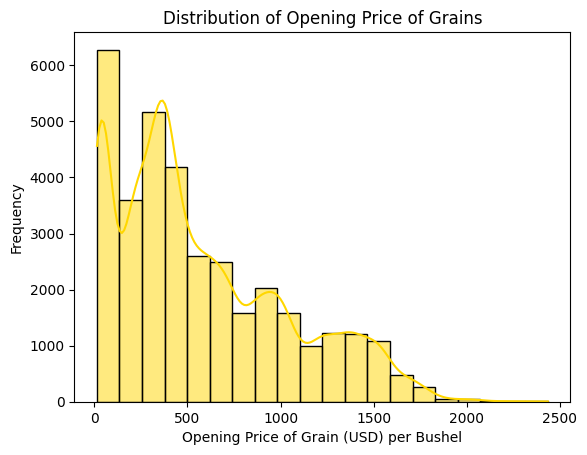

In [41]:
# histogram for open
sns.histplot(df_grain['open'], bins=20,  color='gold', kde=True)
plt.xlabel('Opening Price of Grain (USD) per Bushel')
plt.ylabel('Frequency')
plt.title('Distribution of Opening Price of Grains')
plt.show()

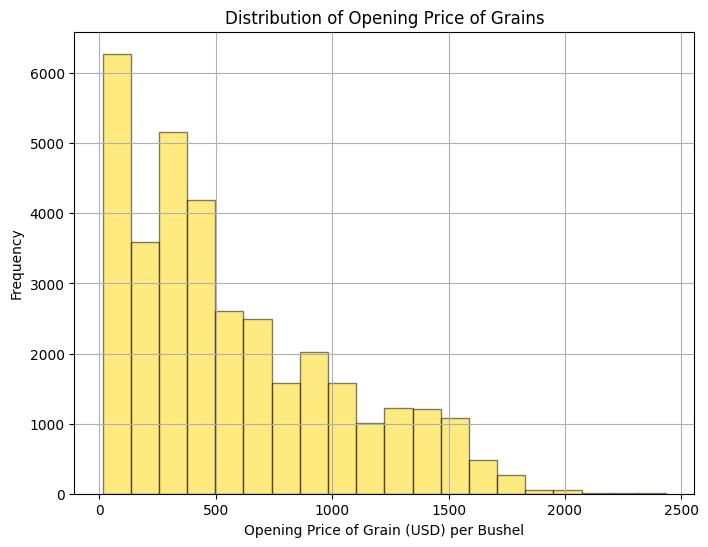

In [49]:
plt.figure(figsize=(8, 6))
plt.hist(df_grain['open'], bins=20, color = 'gold', edgecolor='black', alpha=0.5)
plt.xlabel('Opening Price of Grain (USD) per Bushel')
plt.ylabel('Frequency')
plt.title('Distribution of Opening Price of Grains')
plt.grid()
plt.show()

## **2. Bivariate Analysis**

## **3. Handling Outliers**

## **4. Automated Analysis**